In [1]:
import os
import matplotlib.pyplot as plt
from interstellar import Tracks, set_seed

In [2]:
seed = 101
name = 'tracks_04'
tracks_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'
tracks = Tracks(name=name)
tracks.load(tracks_path)

In [3]:
tracks.get_metadata().head()

,file_path,m,Y,FeH,MLT,ov,dif
0,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.00,0.24,-0.1,2.3,0.0,1
1,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.94,0.32,0.0,2.5,0.0,1
2,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.92,0.28,-0.3,1.7,0.0,1
3,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.91,0.32,0.0,2.5,0.0,1
4,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.01,0.30,-0.1,2.5,0.0,1


In [4]:
tracks.get_data().head()

,log_frac_age_norm,log_initial_mass_norm,log_initial_MLT_norm,initial_feh_norm,log_initial_Yinit_norm,log_initial_Zinit_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm,log_surface_he4_norm,log_surface_Z_norm
0,-1.881058,0.0,0.082728,-0.1,-0.066789,-0.062707,-1.734604,0.005556,-0.152094,0.225712,-0.006076,0.001246,-0.012479
1,-1.825820,0.0,0.082728,-0.1,-0.066789,-0.062707,-1.679366,0.005601,-0.151709,0.225138,-0.006265,0.001086,-0.012614
2,-1.767652,0.0,0.082728,-0.1,-0.066789,-0.062707,-1.621198,0.005644,-0.151313,0.224547,-0.006491,0.000894,-0.012777
3,-1.706793,0.0,0.082728,-0.1,-0.066789,-0.062707,-1.560340,0.005686,-0.150899,0.223932,-0.006767,0.000660,-0.012976
4,-1.643494,0.0,0.082728,-0.1,-0.066789,-0.062707,-1.497041,0.005731,-0.150461,0.223281,-0.007098,0.000381,-0.013213


In [5]:
x_cols = ['log_frac_age_norm', 'log_initial_mass_norm', 'log_initial_MLT_norm', 
          'log_initial_Yinit_norm', 'log_initial_Zinit_norm',]
y_cols = ['log_star_age_norm', 'log_effective_T_norm', 'log_radius_norm',
          'log_delta_nu_fit_norm', 'star_feh_norm']

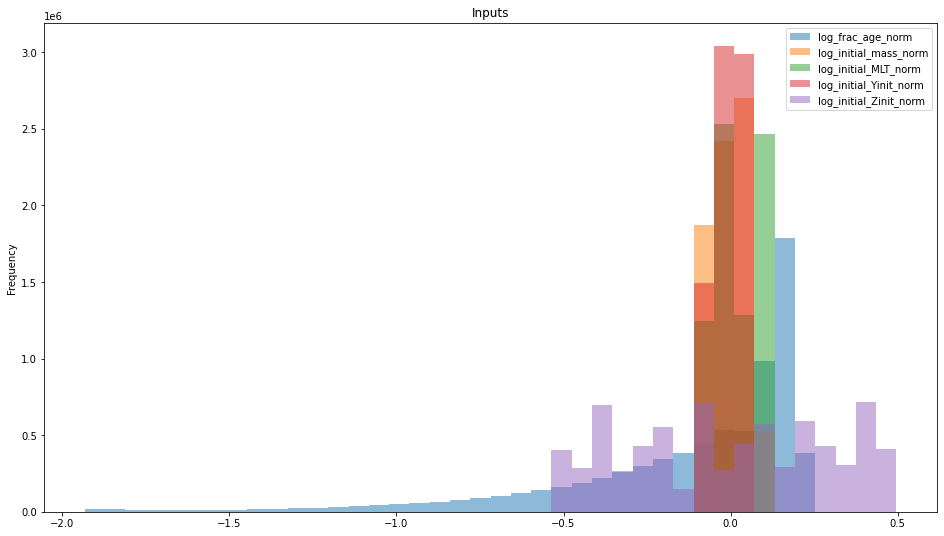

In [6]:
ax = tracks.get_data().plot(kind='hist', figsize=(16, 9),
                       y=x_cols, bins=40, alpha=0.5)
ax.set_title('Inputs');

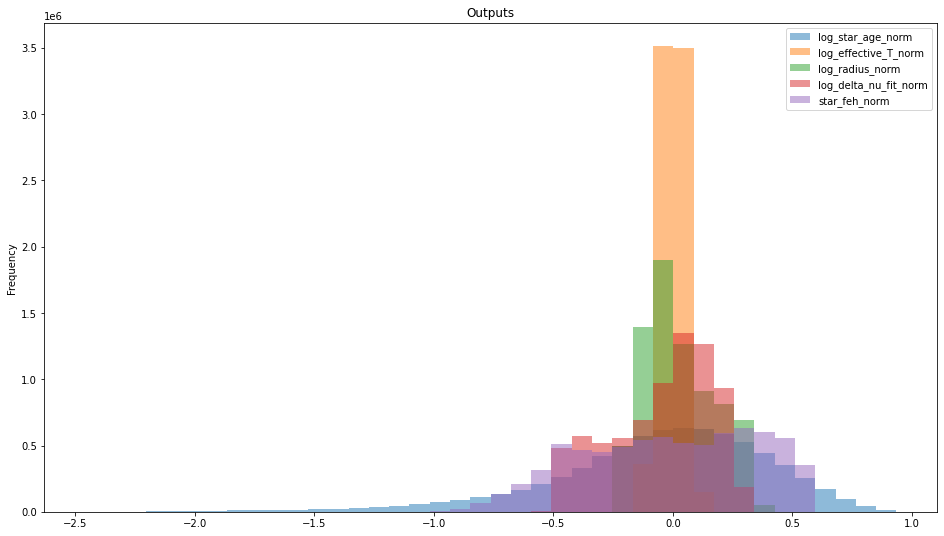

In [7]:
ax = tracks.get_data().plot(kind='hist', figsize=(16, 9),
                       y=y_cols, bins=40, alpha=0.5)
ax.set_title('Outputs');

Shuffle the data and select columns

In [8]:
set_seed(seed)
data = tracks.sample_data(fraction=1.0, columns=x_cols+y_cols)
data.head()

,log_frac_age_norm,log_initial_mass_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_initial_Zinit_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
62279,0.009308,-0.031517,-0.102909,0.000158,0.495839,0.472568,-0.067146,-0.056785,0.073284,0.487025
4185218,0.152353,-0.050610,-0.102909,-0.032027,0.024120,0.483799,-0.073189,0.166551,-0.268818,0.054685
7478373,-0.361507,-0.045757,-0.048551,0.030121,0.292369,-0.035501,-0.040335,-0.143945,0.193347,0.349513
4993317,-0.818465,-0.065502,0.082728,0.058150,-0.209744,-0.743654,0.022823,-0.180811,0.234198,-0.125041
5026900,-0.462858,-0.017729,0.043219,0.030121,0.195494,-0.311242,-0.003517,-0.134803,0.192343,0.264007


In [9]:
print(f'Length of dataset = {len(data)}')

Length of dataset = 7525326


In [10]:
train = data.head(int(0.8*len(data)) + 1)
val = data.tail(int(0.2*len(data)))

data = None  # Remove the data variable, no longer needed

In [11]:
print(f'Length of training data = {len(train)}')
print(f'Length of validation data = {len(val)}')

Length of training data = 6020261
Length of validation data = 1505065


In [12]:
train.to_csv(os.path.join(tracks_path, f'{tracks.name}_train.csv'), index=False)
val.to_csv(os.path.join(tracks_path, f'{tracks.name}_val.csv'), index=False)